In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback

In [ ]:


wandb.init(project='fashion_mnist')



<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:


config=wandb.config
config.learning_rate=0.001



In [ ]:
dataset=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

9


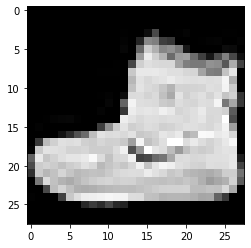

In [ ]:
plt.imshow(X_train[0],cmap='gray')
print(Y_train[0])

In [ ]:
print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

(60000, 28, 28)


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,callbacks=[WandbCallback()])

Epoch 1/20
1500/1500 [==============================] - 8s 3ms/step - loss: 1.7239 - accuracy: 0.6570 - val_loss: 0.7790 - val_accuracy: 0.7110 - _timestamp: 1646566248.0000 - _runtime: 18.0000
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7096 - accuracy: 0.7331 - val_loss: 0.7243 - val_accuracy: 0.7072 - _timestamp: 1646566253.0000 - _runtime: 23.0000
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6248 - accuracy: 0.7650 - val_loss: 0.6312 - val_accuracy: 0.7803 - _timestamp: 1646566259.0000 - _runtime: 29.0000
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5704 - accuracy: 0.7915 - val_loss: 0.5554 - val_accuracy: 0.8090 - _timestamp: 1646566264.0000 - _runtime: 34.0000
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5113 - accuracy: 0.8216 - val_loss: 0.5324 - val_accuracy: 0.8180 - _timestamp: 1646566270.0000 - _runtime: 40.0000
Epoch 6/20
1500/1500 [========

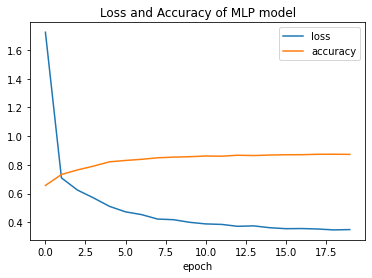

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model')
plt.show()

In [ ]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_test.shape)

(10000, 28, 28)
(10000,)
(10000, 784)


In [ ]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.8564


In [ ]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [ ]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [ ]:
model_deep=tf.keras.models.Sequential([
                                  layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(5,5),activation='relu'),

                                  layers.Flatten(),

                                  layers.Dense(64,activation='relu'),
                                  layers.Dense(10,activation='softmax')

])

In [ ]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 64)               

In [ ]:
model_deep.compile(tf.keras.optimizers.SGD(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
output_deep=model_deep.fit(X_train_deep,Y_train_deep,epochs=20,callbacks=[WandbCallback()])

Epoch 1/20
1500/1500 [==============================] - 16s 6ms/step - loss: 2.2473 - accuracy: 0.2755 - _timestamp: 1646566366.0000 - _runtime: 136.0000
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.7404 - accuracy: 0.4761 - _timestamp: 1646566376.0000 - _runtime: 146.0000
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0383 - accuracy: 0.6093 - _timestamp: 1646566385.0000 - _runtime: 155.0000
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8866 - accuracy: 0.6672 - _timestamp: 1646566394.0000 - _runtime: 164.0000
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8158 - accuracy: 0.6983 - _timestamp: 1646566404.0000 - _runtime: 174.0000
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.7670 - accuracy: 0.7185 - _timestamp: 1646566413.0000 - _runtime: 183.0000
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.73

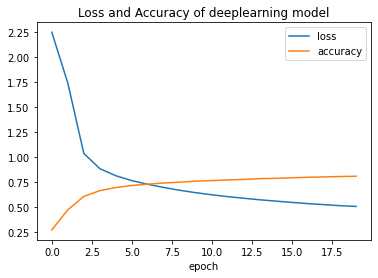

In [ ]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model')
plt.show()

In [ ]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 2s 4ms/step - loss: 0.5299 - accuracy: 0.8079


[0.529906690120697, 0.8079000115394592]